# Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

In [2]:
survey = pd.read_csv("COGS 108 UCSD e-learning survey 02-23.csv")
survey.head()

,Timestamp,Do you acknowledge the agreement above,Are you an undergrad student at UC San Diego,How many academic quarters have you studied at UCSD? (Summer sessions and WI21 excluded),What is your average study time during the pandemic for each class per week (numbers in hours)?,What is your average study time before the pandemic for each class per week (numbers in hours)? FA19 and WI20 data will be preferred. Please put N/A if enter after FA20.,Do you think remote learning makes you spend more time on studying?,How do you rank your overall remote learning experience after pandemic (since SP20)?,How do you think the online learning affect your academic performance?,What was your average GPA before the pandemic? Please put N/A if enter after FA20.,What is you average GPA during the pandemic?,What is your expected GPA in WI21?
0,2/10/2021 20:56:57,Yes,YES,4,7,4,4,3,4,4,3.900,4
1,2/10/2021 20:57:26,Yes,YES,1,7,NaN,3,4,4,NaN,4.000,4
2,2/10/2021 20:58:57,Yes,YES,8,6,8,1,3,2,3.8,3.900,3.92
3,2/10/2021 21:04:38,Yes,NO,12,5,12,3,2,2,2.5,2.000,0
4,2/10/2021 21:08:05,Yes,YES,1,18,NaN,2,4,4,NaN,3.466,3.8


In [3]:
survey.shape


(45, 12)

In [4]:
survey.dtypes

Timestamp                                                                                                                                                                     object
Do you acknowledge the agreement above                                                                                                                                        object
Are you an undergrad student at UC San Diego                                                                                                                                  object
How many academic quarters have you studied at UCSD? (Summer sessions and WI21 excluded)                                                                                      object
What is your average study time during the pandemic for each class per week (numbers in hours)?                                                                               object
What is your average study time before the pandemic for each class per week (numbers in hours)?

# Data Cleaning

First, we will clean the dataset by changing the columns names and remove the timestamp column

In [5]:
survey = survey.drop(survey.columns[0], axis = 1)

In [6]:
survey.columns = ['agreement','undergrad','quarters',
    'studytime_during','studytime_before', 'studytime_rating',
    'experience_rating', 'performance_rating','gpa_before',
    'gpa_during', 'expected_gpa']

Then we will have to remove any observations that answered NO to the agreement and who are not an undergraduate UCSD students because it is out of the scope of our research.

In [8]:
survey = survey[(survey['agreement'] == 'Yes')&(survey['undergrad'] == 'YES')].reset_index()

Check if all observations answered no to first two questions are removed

In [9]:
print(survey['agreement'].unique())
print(survey['undergrad'].unique())

['Yes']
['YES']


## Sub datasets for ratings, study time and gpa

There are three questions asking about students rating on remote leanring, all three are answered in a scale from 1 to 5. We will have a separate dataset for these three questions.
Also, in the survey, we asked questions on both study time and students' gpa. To avoid confusion and for better analyzing the data, we will separate these into two data sets.
By previewing the datasets, we found there were students who did not provide answers to certain questions, but other questions were answered. We are separating the datasets so that when we are removing null values, we are keep the answers to other questions provided by the student.

### Dataset for students' ratings on remote learning

In [10]:
rating_df = survey[['studytime_rating', 'performance_rating', 'experience_rating']]

In [11]:
rating_df = rating_df.apply(pd.to_numeric)
rating_df.head()

,studytime_rating,performance_rating,experience_rating
0,4,4,3
1,3,4,4
2,1,2,3
3,2,4,4
4,4,2,2


### Dataset for students' study hours before and during remote learning

In [12]:
studytime_df = survey[['studytime_before' ,'studytime_during']]
studytime_df

,studytime_before,studytime_during
0,4,7
1,NaN,7
2,8,6
3,NaN,18
4,NaN,8
5,1,1
6,NaN,12hrs
7,NaN,3-4
8,NaN,6
9,8,7


In order to measure the difference of study hours before and during the pandemic, we need data on both studytime_before and studytime_during. Null values are make it difficult to compare the differences and we will remove the null values.

In [13]:
studytime_df = studytime_df.dropna()

In [14]:
print(studytime_df['studytime_during'].unique())
print(studytime_df['studytime_before'].unique())

['7' '6' '1' '4' '8' '2.5' '10' '40' '3-5' '2' '20' '6.5' '6-8' '30'
 '20 hours' '35' '3' '80']
['4' '8' '1' '3' '6' '30' '4-6' '20' '7' '10-12' '12' '35' '10' '60' '2']


When previewing the data, we found that some data contains units such as \"hours, hour\", we need to git rid of the units and compare only the numeric values.

In [15]:
def removeunit(string):
    string = string.lower()
    string = string.strip()
    
    string = string.replace('hours', '') 
    string = string.replace('hour', '')
    string = string.replace('hrs', '')
        
    string = string.strip()
    return string

studytime_df['studytime_during'] = studytime_df['studytime_during'].apply(removeunit)
studytime_df['studytime_before'] = studytime_df['studytime_before'].apply(removeunit)
studytime_df
studyhour_before = studytime_df['studytime_during']
studytime_df['studytime_during'] = studyhour_before.str.rstrip(' hours hour')
studytime_df.head()

<ipython-input-15-ca33b5f0d368>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studytime_df['studytime_during'] = studytime_df['studytime_during'].apply(removeunit)
<ipython-input-15-ca33b5f0d368>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studytime_df['studytime_before'] = studytime_df['studytime_before'].apply(removeunit)
<ipython-input-15-ca33b5f0d368>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,studytime_before,studytime_during
0,4,7
2,8,6
5,1,1
9,8,7
10,3,4


Also, we've noticed that some students provided a range of hours instead of a number. For the purpose of analyzing, we will take the average values and use these instead.

In [17]:
time1 = studytime_df['studytime_during'].apply(lambda studytime_during: str(studytime_during).split('-')[0])
time2 = studytime_df['studytime_during'].apply(lambda studytime_during: str(studytime_during).split('-')[-1])
new_time_during = (time1.astype(float) + time2.astype(float))/ 2

new_time_during
studytime_df['studytime_during'] = new_time_during

<ipython-input-17-004ba621beba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studytime_df['studytime_during'] = new_time_during


In [18]:
time1 = studytime_df['studytime_before'].apply(lambda studytime_before: str(studytime_before).split('-')[0])
time2 = studytime_df['studytime_before'].apply(lambda studytime_before: str(studytime_before).split('-')[-1])
new_time_before = (time1.astype(float) + time2.astype(float))/ 2
new_time_before

studytime_df['studytime_before'] = new_time_before
studytime_df.head()

<ipython-input-18-6396e9f12fad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studytime_df['studytime_before'] = new_time_before


,studytime_before,studytime_during
0,4.0,7.0
2,8.0,6.0
5,1.0,1.0
9,8.0,7.0
10,3.0,4.0


In [19]:
studytime_df.reset_index()
studytime_df.dtypes

studytime_before    float64
studytime_during    float64
dtype: object

### Dataset for students' GPA before and during remote learning

Next, we will create a separate dataframe for comparing GPAs before and during the pandemic.

In [20]:
GPA_df = survey[['gpa_before','gpa_during']]

To compare, we will need to have data of GPA both before and during the pandemic, to do so, we will remove all the null values as they do not contribute to our questions here.

In [21]:
GPA_df = GPA_df.dropna()
GPA_df.head()

,gpa_before,gpa_during
0,4,3.9
2,3.8,3.9
5,3.785,4.0
7,NA,3.2
9,3.6,3.7


While viewing only the top several observations, we found that there are other null values that haven't been removed. We will remove these as well.

In [22]:
GPA_df = GPA_df[GPA_df['gpa_before'].apply(lambda gpa: gpa != " NA")]

In [23]:
GPA_df.head()

,gpa_before,gpa_during
0,4,3.9
2,3.8,3.9
5,3.785,4.0
9,3.6,3.7
10,3.8,3.8


Now we have all the values, we will convert the datatype to numerics.

In [26]:
GPA_df['gpa_before'] = GPA_df['gpa_before'].astype(float)
GPA_df['gpa_during'] = GPA_df['gpa_during'].astype(float)

In [27]:
GPA_df.reset_index()
GPA_df.dtypes

gpa_before    float64
gpa_during    float64
dtype: object

# Exploratory data analysis (EDA)

In the survey, we have three questions that directly asked students about how they feel about the online learning experiences, including effects on study hours, academic performance and overall experiences. We asked students to answer in a scale from 1 to 5.

In the question ***Do you think remote learning makes you spend more time on studying?*** 1 means spend less time and 5 means spend more time.

In the question ***How do you think the online learning affect your academic performance?*** 1 means negatively affected and 5 means positively affected

In the question ***How do you rank your overall remote learning experience after pandemic (since SP20)?*** 1 means least satisfied and 5 means most satisfied

## Plots on self-reported ratings of remote learning

Text(0.5, 1.0, "Students' rating on study time before and during remote learning")

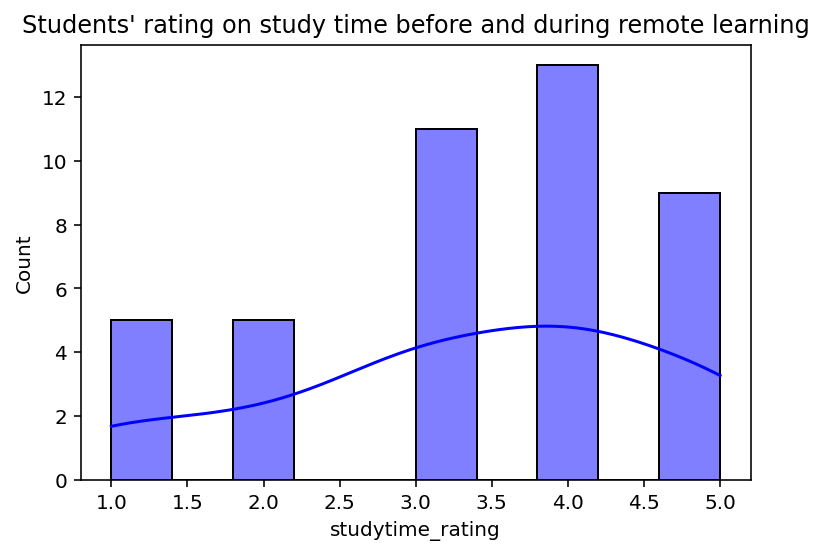

In [28]:
studyhour_plot = sns.histplot(x='studytime_rating', data = rating_df, kde = True, bins = 10, color = 'blue')
studyhour_plot.set_title("Students' rating on study time before and during remote learning")

From the self-reported rating on study time before and during remote learning, the plot shows that more students answered 3/4/5, which means they are spending more time studying during the pandemic than before.

Text(0.5, 1.0, "Students' rating on academic performance before and during remote learning")

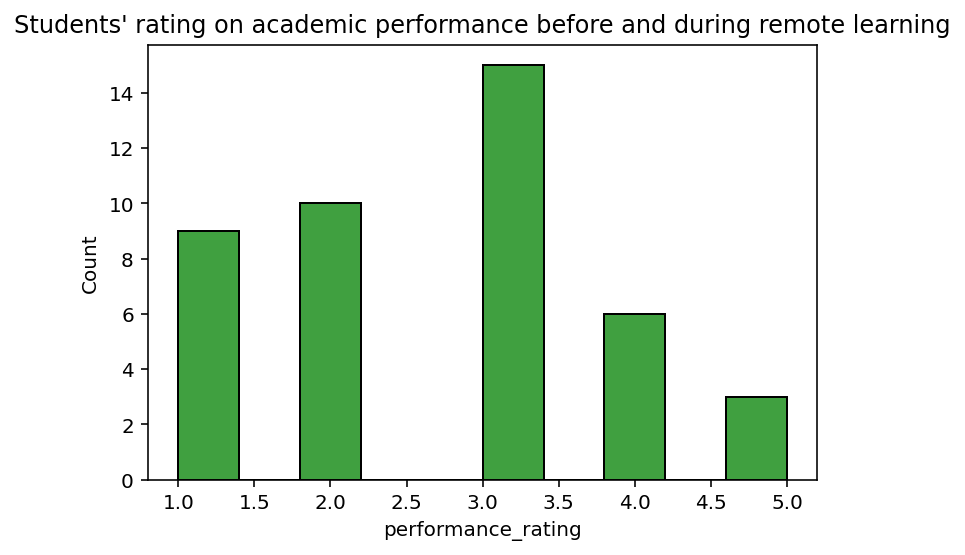

In [29]:
performance_plot = sns.histplot(x='performance_rating', data = rating_df, bins = 10, color = 'green')
performance_plot.set_title("Students' rating on academic performance before and during remote learning")

For how does remote learning affect students academic performance, less than 50% percent students answered their academic performance are positively affected by remote learning.

Text(0.5, 1.0, "Students' rating on experience before and during remote learning")

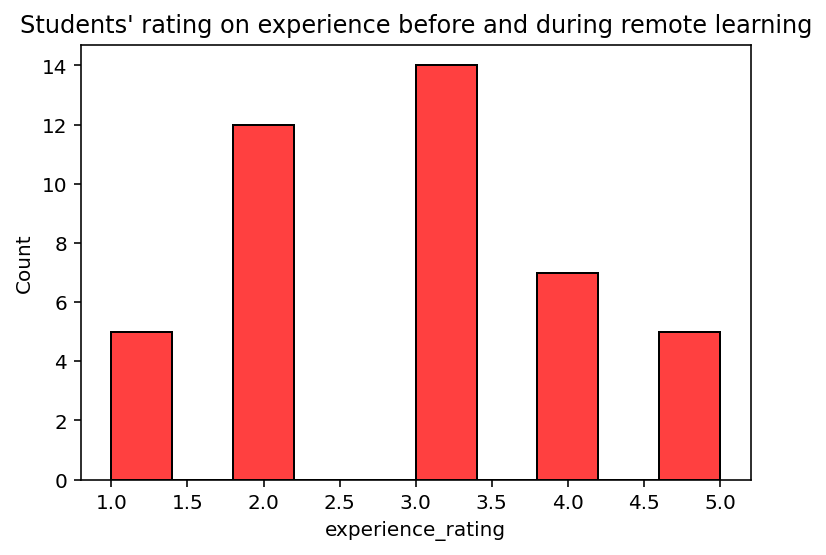

In [30]:
experience_plot = sns.histplot(x='experience_rating', data = rating_df, bins = 10, color = 'red')
experience_plot.set_title("Students' rating on experience before and during remote learning")

In this plot, majority of the students reported *neutral* on how have their overall experience changed before and by the remote learning during the pandemic. There were also some students feel their performance negatively affected.

#### To summarize, in students self-reported data, we found that most students feel they have increased their study hours during the pandemic but only about 50% of the students feel that their academic performance are negatively affected, and the overall experience of remote learning dissatisfied, with the majority of them picked 'neutral'.\n",
#### Our hypothesis was that remote learning negatively affected students' learning experiences. From students self-reported ratings on studytime, academic performance and overall experiences, we do not yet have strong evidence to support our hypothesis, but the data shows that at least 50% of the students feel their learning experiences are negatively affected by remote learning experiences. 

## Difference between study hours before and during the remote learning in the pandemic?

To further investigate how online learning during the pandemic affects students' academic performance and expectations, we will look at more detailed data - study hours and GPA.

Text(0.5, 1.0, "Students' study hours before and during remote learning")

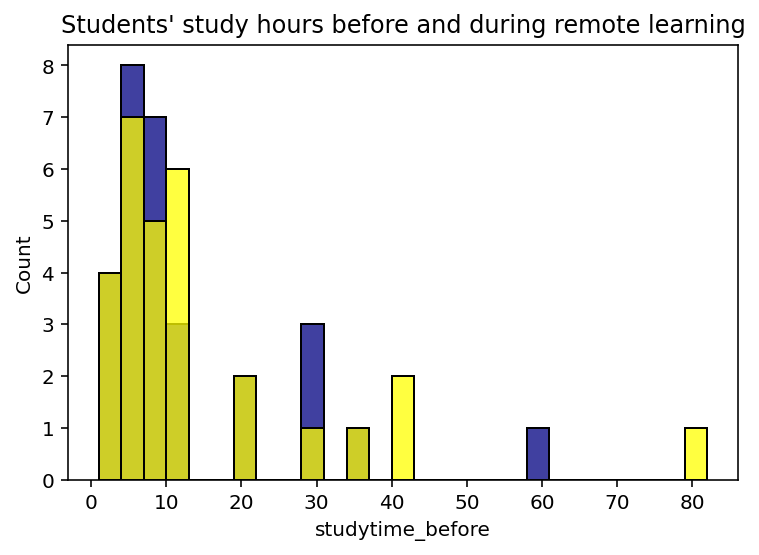

In [31]:
studyhour_before_plot = sns.histplot(x='studytime_before', data = studytime_df, binwidth = 3, color = 'navy')
studyhour_during_plot = sns.histplot(x='studytime_during', data = studytime_df, binwidth = 3, color = 'yellow')
studyhour_during_plot.set_title("Students' study hours before and during remote learning")

From the above plot, we found that there are values that are greater than 30, which is a unrealistic number for study hour of each class per week. Our guess is that the student might misread the question and thought it was asking for total hours per week. We will remove these observation for the clearity of the plot and analysis.

In [32]:
studytime_df = studytime_df[(studytime_df['studytime_before'] < 30) & (studytime_df['studytime_during'] < 30)]
studytime_df.reset_index()

,index,studytime_before,studytime_during
0,0,4.0,7.0
1,2,8.0,6.0
2,5,1.0,1.0
3,9,8.0,7.0
4,10,3.0,4.0
5,11,6.0,8.0
6,12,4.0,2.5
7,13,8.0,10.0
8,14,6.0,10.0
9,16,5.0,4.0


Before making the plot, we want to have a look of the average study hours before and during the remote learning to see if there is a difference in mean.

In [33]:
studyhour_before_mean = studytime_df['studytime_before'].mean()
studyhour_during_mean = studytime_df['studytime_during'].mean()
print(studyhour_before_mean, studyhour_during_mean)

6.695652173913044 7.021739130434782


From the calculation, it seems that there is a difference between study hours before and during the pandemic. We will now plot these data to see the distributions.

Text(0.5, 0, 'study hours')

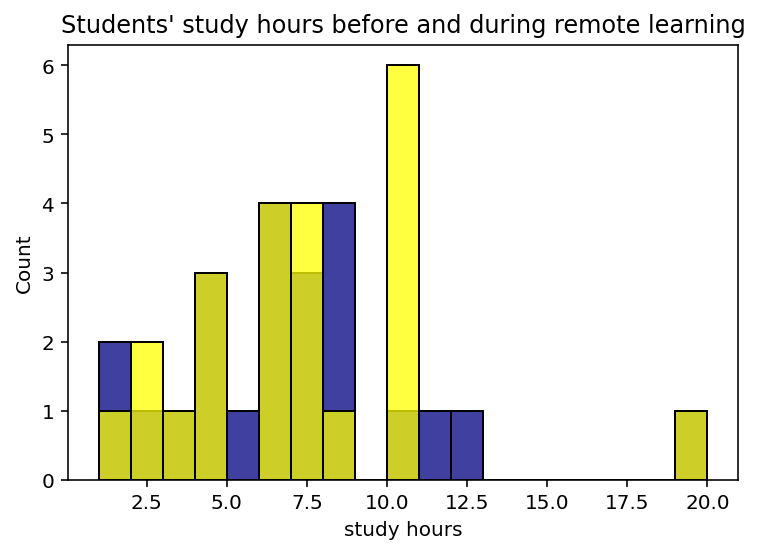

In [34]:
studyhour_before_plot = sns.histplot(x='studytime_before', data = studytime_df, binwidth = 1, color = 'navy')
studyhour_during_plot = sns.histplot(x='studytime_during', data = studytime_df, binwidth = 1, color = 'yellow')
studyhour_during_plot.set_title("Students' study hours before and during remote learning")
studyhour_during_plot.set_xlabel('study hours')

The plot shows that during the pandemic(yellow), the students who study for 10 hours are more than that before the pandemic. But there are some students who studied for over 10 hours per day before the pandemic. Also, there is a single student whose study hour increased to 20 hours during the pandemic.

The plot allows us to compare the overall distribution of study hours before and during the remote learning, but it is not great for visualizing differences, so we will plot a histogram for difference only.

In [35]:
studytime_df = studytime_df.assign(diff = studytime_df['studytime_during'] - studytime_df['studytime_before'])

Text(0.5, 1.0, 'Difference in study time before and during remote learning')

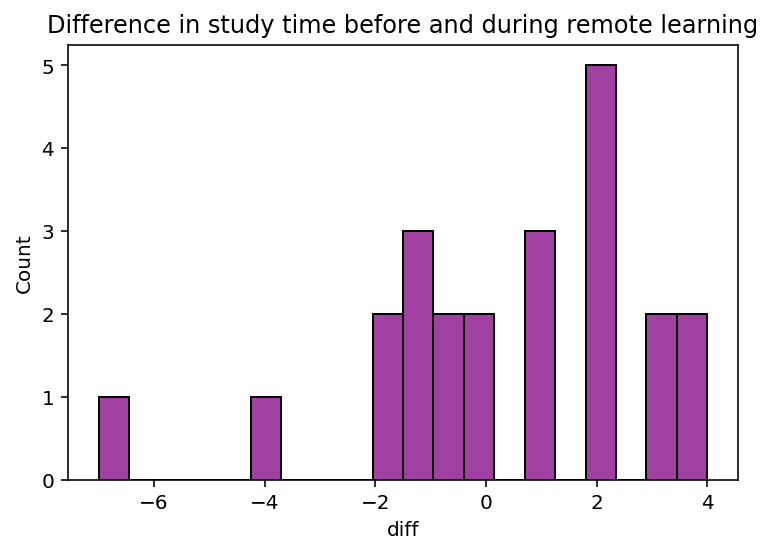

In [36]:
studyhour_diff_plot = sns.histplot(x='diff', data = studytime_df, bins = 20, color = 'purple')
studyhour_diff_plot.set_title("Difference in study time before and during remote learning")

The plot shows that about half of the students' study hours increased during the remote learning, but there are still students whose study hours reduced 6 hours during the remote learning. From this plot, we could not make any conclusion on whether students' study hours increased or not in the pandemic.

## Difference in academic performance before and during the remote learning?

To measure the academic performance, we will mainly be using students GPA before and during the pandemic.

First, we will take a look of the average GPA before and during remote learning. 

In [37]:
gpa_before_mean = GPA_df['gpa_before'].mean()
gpa_during_mean = GPA_df['gpa_during'].mean()
print(gpa_before_mean, gpa_during_mean)

3.619318181818181 3.6950000000000003


The average values show there is only a small difference between GPAs before and during the pandemic, we will now plot the graphs to see details on GPA.

Text(0.5, 0, 'GPA')

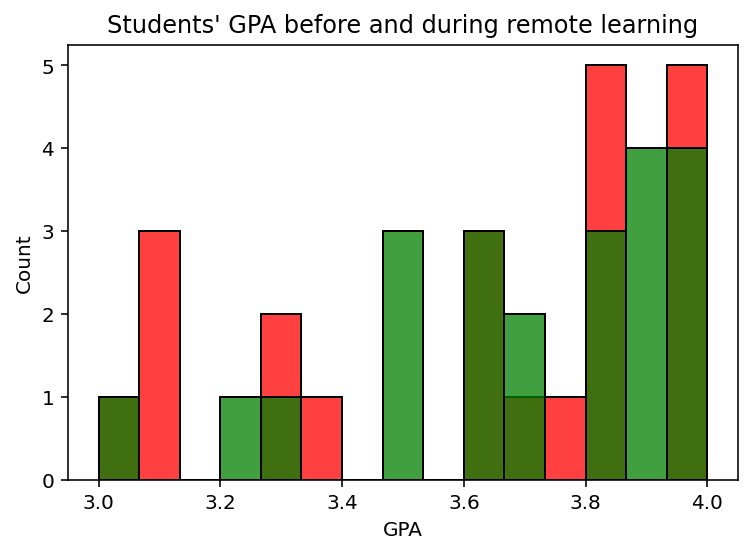

In [38]:
gpa_before_plot = sns.histplot(x='gpa_before', data = GPA_df, bins = 15, color = 'red')
gpa_during_plot = sns.histplot(x='gpa_during', data = GPA_df, bins = 15, color = 'green')
gpa_during_plot.set_title("Students' GPA before and during remote learning")
gpa_during_plot.set_xlabel('GPA')

The plot shows that more students have a close to 3.0 GPA before than during the remote learning.

In [39]:
GPA_df = GPA_df.assign(diff = GPA_df['gpa_during'] - GPA_df['gpa_before'])

Text(0.5, 1.0, 'Difference in GPA before and during remote learning')

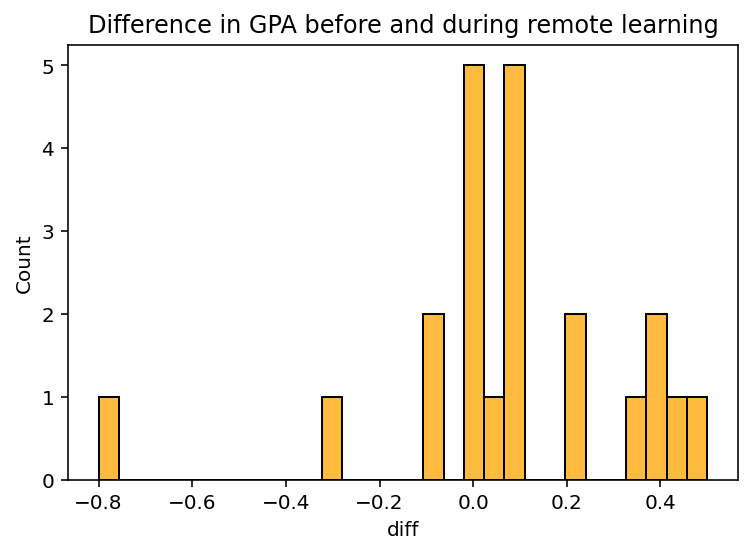

In [41]:
gpa_diff_plot = sns.histplot(x='diff', data = GPA_df, bins = 30, color = 'orange')
gpa_diff_plot.set_title("Difference in GPA before and during remote learning")

From this plot, we can see that most students' GPA actually increased during the remote learning than before.

#### By looking at the difference in studytime and GPA before and during the pandemic, we found that the learning experiences in terms of study hours have increased during the remote learning, however, students average GPA also increased during the remote learning.